In [141]:
%tensorflow_version 2.x
import tensorflow as tf
import os
import pandas as pd
import numpy as np

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [142]:
df = pd.read_csv('./sst.csv')
df

,week,sst1,ssta1,sst2,ssta2,sst3,ssta3,sst4,ssta4
0,03-Jan-90,23.4,-0.4,25.1,-0.3,26.6,0.0,28.6,0.3
1,10-Jan-90,23.4,-0.8,25.2,-0.3,26.6,0.1,28.6,0.3
2,17-Jan-90,24.2,-0.3,25.3,-0.3,26.5,-0.1,28.6,0.3
3,24-Jan-90,24.4,-0.5,25.5,-0.4,26.5,-0.1,28.4,0.2
4,31-Jan-90,25.1,-0.2,25.8,-0.2,26.7,0.1,28.4,0.2
...,...,...,...,...,...,...,...,...,...
1617,30-Dec-20,22.2,-1.3,24.4,-0.9,25.4,-1.2,27.3,-1.1
1618,06-Jan-21,23.1,-0.8,24.7,-0.8,25.5,-1.1,27.1,-1.2
1619,13-Jan-21,24.0,-0.3,24.7,-0.9,25.4,-1.2,27.0,-1.3
1620,20-Jan-21,23.9,-0.8,25.2,-0.6,25.5,-1.1,26.9,-1.4


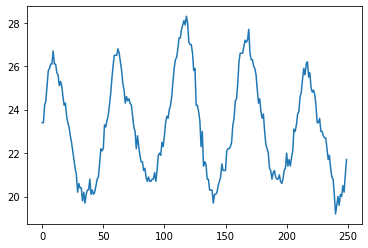

In [143]:
temp = df['sst1']
temp[:250].plot()

In [144]:
# [[[1], [2], [3], [4], [5]]] [6]
# [[[2], [3], [4], [5], [6]]] [7]
# [[[3], [4], [5], [6], [7]]] [8]

def df_to_X_y(df, window_size=5):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [[a] for a in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size]
    y.append(label)
  return np.array(X), np.array(y)

In [145]:
WINDOW_SIZE = 10
print(temp.shape)
X1, y1 = df_to_X_y(temp, WINDOW_SIZE)
X1.shape, y1.shape

(1622,)


((1612, 10, 1), (1612,))

In [146]:
X_train1, y_train1 = X1[:1000], y1[:1000]
# X_val1, y_val1 = X1[60000:65000], y1[60000:65000]
X_test1, y_test1 = X1[1000:], y1[1000:]
# X_train1.shape, y_train1.shape, X_val1.shape, y_val1.shape, X_test1.shape, y_test1.shape
X_train1.shape, y_train1.shape, X_test1.shape, y_test1.shape

((1000, 10, 1), (1000,), (612, 10, 1), (612,))

In [147]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import *
from keras.callbacks import ModelCheckpoint
from keras.losses import MeanSquaredError
from keras.metrics import RootMeanSquaredError
from keras.optimizers import Adam
from keras.optimizers import SGD

model1 = Sequential()
model1.add(InputLayer((10, 1))) # change
model1.add(LSTM(64))
model1.add(Dense(8, 'relu'))
model1.add(Dense(1, 'linear'))

model1.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 64)                16896     
                                                                 
 dense_8 (Dense)             (None, 8)                 520       
                                                                 
 dense_9 (Dense)             (None, 1)                 9         
                                                                 
Total params: 17,425
Trainable params: 17,425
Non-trainable params: 0
_________________________________________________________________


In [148]:
cp1 = ModelCheckpoint('model1/', save_best_only=True)
model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.01), metrics=[RootMeanSquaredError()])

In [149]:
model1.fit(X_train1, y_train1, validation_data=(X_test1, y_test1), epochs=20, callbacks=[cp1])

Epoch 1/20
24/32 [=====================>........] - ETA: 0s - loss: 143.8073 - root_mean_squared_error: 11.9920

32/32 [==============================] - 10s 219ms/step - loss: 115.2036 - root_mean_squared_error: 10.7333 - val_loss: 11.4799 - val_root_mean_squared_error: 3.3882
Epoch 2/20
23/32 [====================>.........] - ETA: 0s - loss: 7.4987 - root_mean_squared_error: 2.7384

32/32 [==============================] - 5s 159ms/step - loss: 7.2214 - root_mean_squared_error: 2.6873 - val_loss: 5.9454 - val_root_mean_squared_error: 2.4383
Epoch 3/20
24/32 [=====================>........] - ETA: 0s - loss: 6.0889 - root_mean_squared_error: 2.4676

32/32 [==============================] - 6s 186ms/step - loss: 6.1504 - root_mean_squared_error: 2.4800 - val_loss: 5.6279 - val_root_mean_squared_error: 2.3723
Epoch 4/20
32/32 [==============================] - 0s 7ms/step - loss: 6.0605 - root_mean_squared_error: 2.4618 - val_loss: 5.6469 - val_root_mean_squared_error: 2.3763
Epoch 5/20
22/32 [===================>..........] - ETA: 0s - loss: 5.8015 - root_mean_squared_error: 2.4086

32/32 [==============================] - 5s 175ms/step - loss: 6.0088 - root_mean_squared_error: 2.4513 - val_loss: 5.3542 - val_root_mean_squared_error: 2.3139
Epoch 6/20
23/32 [====================>.........] - ETA: 0s - loss: 5.6194 - root_mean_squared_error: 2.3705

32/32 [==============================] - 5s 176ms/step - loss: 5.4766 - root_mean_squared_error: 2.3402 - val_loss: 4.5430 - val_root_mean_squared_error: 2.1314
Epoch 7/20
31/32 [============================>.] - ETA: 0s - loss: 4.1581 - root_mean_squared_error: 2.0391

32/32 [==============================] - 5s 161ms/step - loss: 4.1323 - root_mean_squared_error: 2.0328 - val_loss: 3.1346 - val_root_mean_squared_error: 1.7705
Epoch 8/20
32/32 [==============================] - ETA: 0s - loss: 2.8742 - root_mean_squared_error: 1.6954

32/32 [==============================] - 7s 226ms/step - loss: 2.8742 - root_mean_squared_error: 1.6954 - val_loss: 2.1499 - val_root_mean_squared_error: 1.4663
Epoch 9/20
23/32 [====================>.........] - ETA: 0s - loss: 2.1285 - root_mean_squared_error: 1.4589

32/32 [==============================] - 5s 155ms/step - loss: 2.0758 - root_mean_squared_error: 1.4408 - val_loss: 1.4160 - val_root_mean_squared_error: 1.1900
Epoch 10/20
24/32 [=====================>........] - ETA: 0s - loss: 1.4445 - root_mean_squared_error: 1.2019

32/32 [==============================] - 7s 212ms/step - loss: 1.4194 - root_mean_squared_error: 1.1914 - val_loss: 1.0669 - val_root_mean_squared_error: 1.0329
Epoch 11/20
32/32 [==============================] - ETA: 0s - loss: 1.1484 - root_mean_squared_error: 1.0716

32/32 [==============================] - 8s 243ms/step - loss: 1.1484 - root_mean_squared_error: 1.0716 - val_loss: 0.7110 - val_root_mean_squared_error: 0.8432
Epoch 12/20
24/32 [=====================>........] - ETA: 0s - loss: 0.7156 - root_mean_squared_error: 0.8459

32/32 [==============================] - 7s 241ms/step - loss: 0.6909 - root_mean_squared_error: 0.8312 - val_loss: 0.5502 - val_root_mean_squared_error: 0.7417
Epoch 13/20
23/32 [====================>.........] - ETA: 0s - loss: 0.5066 - root_mean_squared_error: 0.7117

32/32 [==============================] - 5s 167ms/step - loss: 0.5154 - root_mean_squared_error: 0.7179 - val_loss: 0.4252 - val_root_mean_squared_error: 0.6521
Epoch 14/20
32/32 [==============================] - 1s 45ms/step - loss: 0.4728 - root_mean_squared_error: 0.6876 - val_loss: 0.5800 - val_root_mean_squared_error: 0.7616
Epoch 15/20
25/32 [======================>.......] - ETA: 0s - loss: 0.4743 - root_mean_squared_error: 0.6887

32/32 [==============================] - 5s 148ms/step - loss: 0.4454 - root_mean_squared_error: 0.6674 - val_loss: 0.3072 - val_root_mean_squared_error: 0.5543
Epoch 16/20
32/32 [==============================] - 2s 65ms/step - loss: 0.3385 - root_mean_squared_error: 0.5818 - val_loss: 0.3679 - val_root_mean_squared_error: 0.6066
Epoch 17/20
32/32 [==============================] - 0s 7ms/step - loss: 0.3705 - root_mean_squared_error: 0.6087 - val_loss: 0.3574 - val_root_mean_squared_error: 0.5978
Epoch 18/20
23/32 [====================>.........] - ETA: 0s - loss: 0.2856 - root_mean_squared_error: 0.5344

32/32 [==============================] - 5s 170ms/step - loss: 0.3006 - root_mean_squared_error: 0.5482 - val_loss: 0.2663 - val_root_mean_squared_error: 0.5160
Epoch 19/20
32/32 [==============================] - 0s 7ms/step - loss: 0.3048 - root_mean_squared_error: 0.5521 - val_loss: 0.3726 - val_root_mean_squared_error: 0.6104
Epoch 20/20
22/32 [===================>..........] - ETA: 0s - loss: 0.3026 - root_mean_squared_error: 0.5501

32/32 [==============================] - 6s 180ms/step - loss: 0.2933 - root_mean_squared_error: 0.5416 - val_loss: 0.2504 - val_root_mean_squared_error: 0.5004


In [153]:
from keras.models import load_model
model1 = load_model('model1/')

In [154]:
train_predictions = model1.predict(X_train1).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y_train1})
train_results

32/32 [==============================] - 1s 2ms/step


,Train Predictions,Actuals
0,26.480524,26.1
1,26.124247,26.1
2,26.007639,25.7
3,25.663046,25.6
4,25.494654,25.1
...,...,...
995,26.275000,25.7
996,25.740145,26.1
997,25.918980,25.4
998,25.411301,25.3


Train Accuracy:  0.25761854113147636


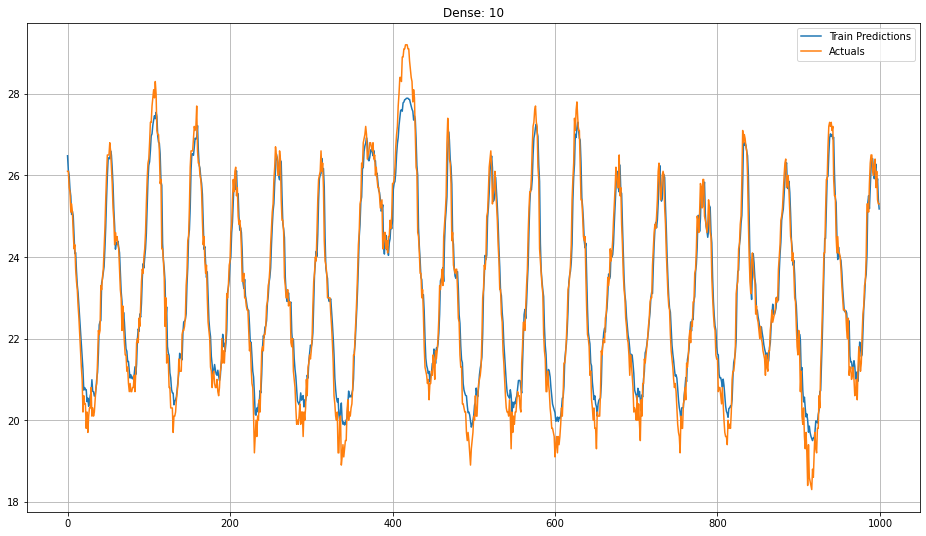

In [155]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = [16,9])
plt.plot(train_results['Train Predictions'][0:1000])
plt.plot(train_results['Actuals'][0:1000])
plt.legend(['Train Predictions', 'Actuals'])
plt.title("Dense: 10")
plt.grid()

from sklearn.metrics import mean_squared_error
print('Train Accuracy: ', mean_squared_error(train_results['Train Predictions'][0:1000], train_results['Actuals'][0:1000]))

In [156]:
train_predictions = model1.predict(X_test1).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y_test1})
train_results

print(X_test1.shape)

20/20 [==============================] - 0s 4ms/step
(612, 10, 1)


Accuracy:  0.25040222903223264


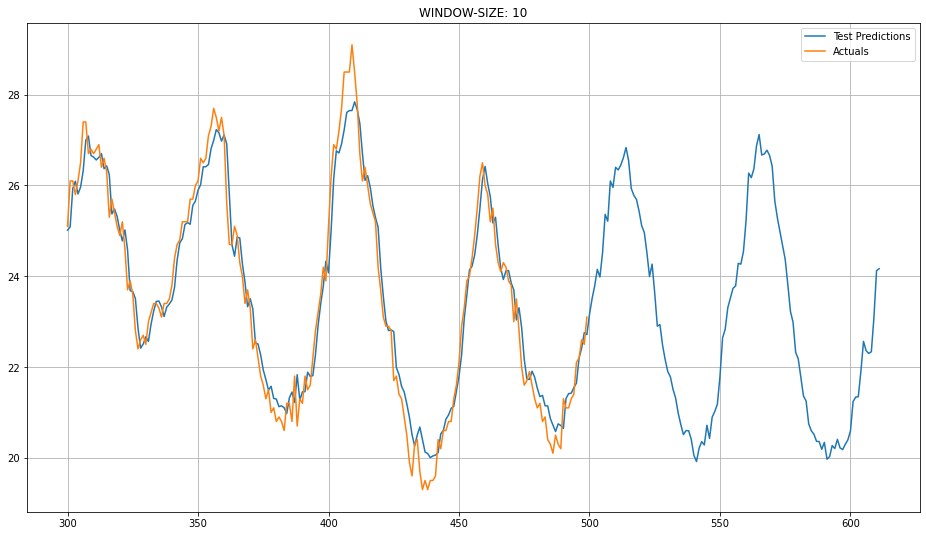

In [157]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = [16,9])
plt.plot(train_results['Train Predictions'][300:612])
plt.plot(train_results['Actuals'][300:500])
plt.legend(['Test Predictions', 'Actuals'])
plt.title("WINDOW-SIZE: 10")
plt.grid()

from sklearn.metrics import mean_squared_error
print('Accuracy: ', mean_squared_error(train_results['Train Predictions'][0:612], train_results['Actuals'][0:612]))